In [15]:
import numpy as np
import pandas as pd 
import sklearn 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from itertools import combinations

from sklearn.preprocessing import LabelEncoder 

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [16]:
train_data=pd.read_csv("train.csv")

In [17]:
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.dropna(inplace=True)

<b> Visualisation for all features with target variable<b>

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

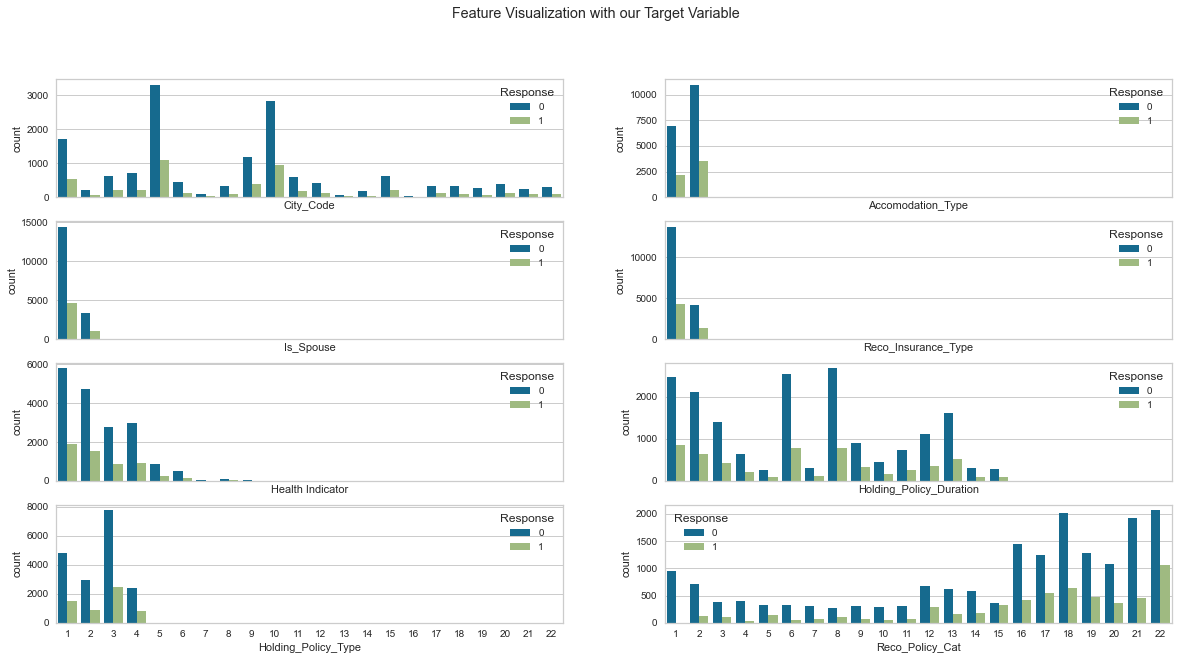

In [18]:
figure, axes = plt.subplots(4, 2, sharex=True, figsize=(20,10))
figure.suptitle('Feature Visualization with our Target Variable')
sns.countplot(ax=axes[0, 0],x='City_Code',hue='Response',data=train_data)
sns.countplot(ax=axes[0, 1],x='Accomodation_Type',hue='Response',data=train_data)
sns.countplot(ax=axes[1, 0],x='Is_Spouse',hue='Response',data=train_data)
sns.countplot(ax=axes[1, 1],x='Reco_Insurance_Type',hue='Response',data=train_data)
sns.countplot(ax=axes[2, 0],x='Health Indicator',hue='Response',data=train_data)
sns.countplot(ax=axes[2, 1],x='Holding_Policy_Duration',hue='Response',data=train_data)
sns.countplot(ax=axes[3, 0],x='Holding_Policy_Type',hue='Response',data=train_data)
sns.countplot(ax=axes[3, 1],x='Reco_Policy_Cat',hue='Response',data=train_data)

<b>Training the model and Comparing accuracy scores with various models </b><br> Using Pycaret to train and compare the data with all the ML algorithms</br>

In [19]:
#train_discrete = pd.get_dummies(train_data)

train, test = train_test_split(train_data, test_size=0.2)

In [20]:
from pycaret.classification import*

In [21]:
clf = setup(data = train, 
            target = 'Response', 
            remove_multicollinearity = True, fix_imbalance = True)


,Description,Value
0,session_id,8325
1,Target,Response
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(18838, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


<b> Compare Various Models and the best fit </b>

In [22]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7608,0.6098,0.0013,0.2167,0.0025,0.0016,0.0121,1.2880
dummy,Dummy Classifier,0.7607,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0520
ada,Ada Boost Classifier,0.7600,0.5530,0.0016,0.0810,0.0031,0.0003,0.0012,0.3390
lightgbm,Light Gradient Boosting Machine,0.7588,0.6359,0.0269,0.4470,0.0507,0.0237,0.0580,0.2110
catboost,CatBoost Classifier,0.7576,0.6321,0.0409,0.4293,0.0746,0.0348,0.0683,7.0150
rf,Random Forest Classifier,0.7559,0.5775,0.0133,0.2865,0.0254,0.0042,0.0117,0.6160
xgboost,Extreme Gradient Boosting,0.7428,0.6190,0.0735,0.3333,0.1202,0.0368,0.0516,1.3330
et,Extra Trees Classifier,0.7406,0.5748,0.0539,0.2832,0.0904,0.0147,0.0220,0.7970
dt,Decision Tree Classifier,0.6397,0.5180,0.2845,0.2649,0.2742,0.0351,0.0351,0.1070
knn,K Neighbors Classifier,0.5384,0.5026,0.4151,0.2360,0.3008,-0.0062,-0.0067,0.1650


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8325, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The Accuracy is higher for Gradient Boosting Classifier, Ada Boost Classifier and Light Gradient Boosting Machine

In [24]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7612,0.6292,0.0063,0.6667,0.0125,0.0081,0.0478
1,0.7604,0.6060,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7604,0.5949,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7604,0.6031,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7604,0.5953,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7604,0.6122,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7618,0.6145,0.0032,1.0000,0.0063,0.0048,0.0492
7,0.7610,0.6456,0.0032,0.5000,0.0063,0.0033,0.0239
8,0.7610,0.6006,0.0000,0.0000,0.0000,0.0000,0.0000


In [25]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7566,0.5527,0.0032,0.1429,0.0062,-0.0042,-0.0166
1,0.7582,0.5627,0.0095,0.3333,0.0185,0.0053,0.0182
2,0.7604,0.5393,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7604,0.5557,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7604,0.5424,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7604,0.5526,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7610,0.5363,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7610,0.5835,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7610,0.5570,0.0000,0.0000,0.0000,0.0000,0.0000


In [26]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7582,0.6593,0.0253,0.4211,0.0478,0.0212,0.0514
1,0.7551,0.6353,0.0222,0.3333,0.0415,0.0120,0.0279
2,0.7597,0.6225,0.0316,0.4762,0.0593,0.0304,0.0705
3,0.7498,0.6260,0.0190,0.2308,0.0351,-0.0014,-0.0029
4,0.7604,0.6483,0.0380,0.5000,0.0706,0.0381,0.0831
5,0.7635,0.6345,0.0316,0.6250,0.0602,0.0380,0.1001
6,0.7640,0.6330,0.0317,0.6250,0.0604,0.0382,0.1003
7,0.7595,0.6427,0.0317,0.4545,0.0593,0.0290,0.0659
8,0.7602,0.6351,0.0254,0.4706,0.0482,0.0243,0.0621


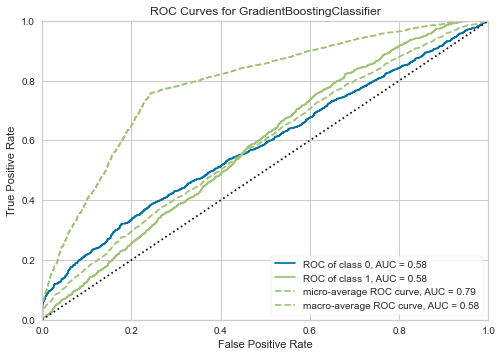

In [29]:
tuned_gbc = tune_model(gbc)
plot_model(tuned_gbc)

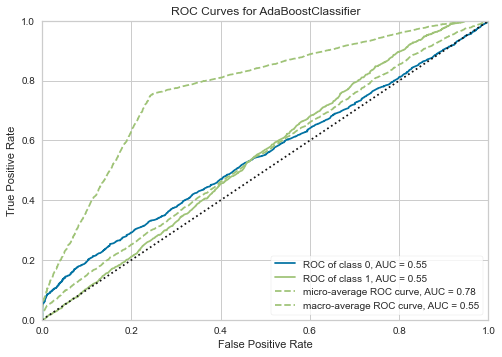

In [31]:
tuned_ada =tune_model(ada)
plot_model(tuned_ada)

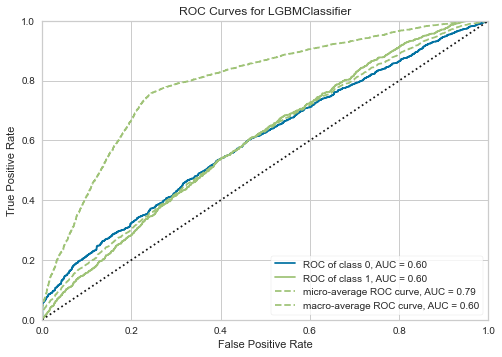

In [32]:
tuned_lightgbm =tune_model(lightgbm)
plot_model(tuned_lightgbm)

In [33]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7565,0.5839,0.0022,0.3750,0.0043,0.0015,0.0116


,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,...,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Response,Label,Score
0,44664.0,580.0,75.0,75.0,3.0,15.0,17052.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.7116
1,10825.0,1062.0,22.0,22.0,2.0,15.0,5384.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.7378
2,15317.0,433.0,75.0,75.0,1.0,18.0,22100.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6148
3,23512.0,1843.0,23.0,23.0,1.0,16.0,6870.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6972
4,43296.0,821.0,48.0,42.0,2.0,21.0,17864.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,15737.0,4593.0,50.0,46.0,4.0,22.0,26342.400391,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.5031
5648,9205.0,399.0,60.0,60.0,2.0,17.0,17472.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6242
5649,1420.0,409.0,51.0,51.0,1.0,15.0,11844.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.7164
5650,24594.0,2692.0,62.0,62.0,3.0,9.0,16352.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6869


In [34]:
predict_model(tuned_ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7530,0.5511,0.0036,0.1562,0.0071,-0.0040,-0.0153


,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,...,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Response,Label,Score
0,44664.0,580.0,75.0,75.0,3.0,15.0,17052.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.5046
1,10825.0,1062.0,22.0,22.0,2.0,15.0,5384.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5034
2,15317.0,433.0,75.0,75.0,1.0,18.0,22100.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5026
3,23512.0,1843.0,23.0,23.0,1.0,16.0,6870.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5048
4,43296.0,821.0,48.0,42.0,2.0,21.0,17864.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,15737.0,4593.0,50.0,46.0,4.0,22.0,26342.400391,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.5014
5648,9205.0,399.0,60.0,60.0,2.0,17.0,17472.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5044
5649,1420.0,409.0,51.0,51.0,1.0,15.0,11844.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5071
5650,24594.0,2692.0,62.0,62.0,3.0,9.0,16352.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5054


In [35]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7569,0.5986,0.0000,0.0000,0.0000,0.0000,0.0000


,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,...,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Response,Label,Score
0,44664.0,580.0,75.0,75.0,3.0,15.0,17052.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.5878
1,10825.0,1062.0,22.0,22.0,2.0,15.0,5384.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5799
2,15317.0,433.0,75.0,75.0,1.0,18.0,22100.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5895
3,23512.0,1843.0,23.0,23.0,1.0,16.0,6870.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5728
4,43296.0,821.0,48.0,42.0,2.0,21.0,17864.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,15737.0,4593.0,50.0,46.0,4.0,22.0,26342.400391,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.5580
5648,9205.0,399.0,60.0,60.0,2.0,17.0,17472.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5690
5649,1420.0,409.0,51.0,51.0,1.0,15.0,11844.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5540
5650,24594.0,2692.0,62.0,62.0,3.0,9.0,16352.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5825
